For this assignment, you will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in Data Analytics! 

The Dataset has been given to you in D2L. You need to download the .csv file from your assignment folder. The above link is just for a reference story about the data. The second part of assignment 3 has 50 points.


## Exercise 
1- For this assignment, you need to perform explorotary data analysis and answer at least three hypotheses based on the dataset. You may need to use your knowledge of statiscts to analyze this data.

Here are three possible hypotheses that you can define for this dataset (you can define your own hypotheses as well):

- Determine if the survival rate is associated to the class of passenger
- Determine if the survival rate is associated to the gender
- Determine the survival rate is associated to the age



2- For each hypothesis, you need to make at least one plot. 

3- Write a summary of your findings in one page (e.g., summary statistics, plots) and submit the pdf file. Therefore, for part 2 of your assignment, you need to submit one jupyter notebook file and one pdf file.



### Github & D2L Submissions
Please create a **public** github repo and submit your answers on both **public github** and on **D2L**. Please include the link to your github repo in your submission. 

**Please follow the below guidelines regarding your github repository:**

The folder structure of your github account should be as followed:
                    
    ├── src                     # Source files (your python code)
    ├── data                    # Data related to the project (titanic.csv)
    ├── result                  # Result of the project (e.g., plots, reports)
    └── doc                     # Documentation files (additional documentations)

You must add **README.md** file to the root repository of your GitHub and explain all the directories in your GitHub repo in README file. Please look at this link as a [reference](https://help.github.com/en/github/creating-cloning-and-archiving-repositories/about-readmes) on how to write the README file.

Here is another great resource for organizing your folder and code on github. Reso

This will be your first end to end data analysis project. For this assignment, you will be graded on you overall analysis, your final report and the structure of your github repo. 

In [70]:
#load the data files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("../data/titanic.csv")
df.info()
display(df.head())
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

,Pclass,Survived
Pclass,1.000000,-0.338481
Survived,-0.338481,1.000000


Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
dtype: int64

,Pclass,Survived,Size
0,3,0,372
1,1,1,136
2,3,1,119
3,2,0,97
4,2,1,87
5,1,0,80


<AxesSubplot:xlabel='Survived', ylabel='count'>

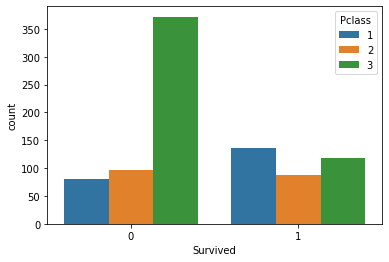

In [85]:
#Determine if the survival rate is associated to the class of passenger


#calculate all correlations in df
display(df[["Pclass","Survived"]].corr())
display(df.groupby(["Pclass","Survived"]).size())
df1 = df[["Pclass","Survived"]].value_counts().to_frame()
df1 = df1.reset_index()
df1.columns = ["Pclass","Survived","Size"]
display(df1)
# sns.catplot(x = "Pclass",       # x variable name
#             y = "Size",       # y variable name
#             hue = "Survived",  # group variable name
#             data = df1,     # dataframe to plot
#             kind = "bar")

sns.countplot(x='Survived',hue='Pclass',data=df)

,Survived
Survived,1.0


Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64

,Sex,Survived,Size
0,male,0,468
1,female,1,233
2,male,1,109
3,female,0,81


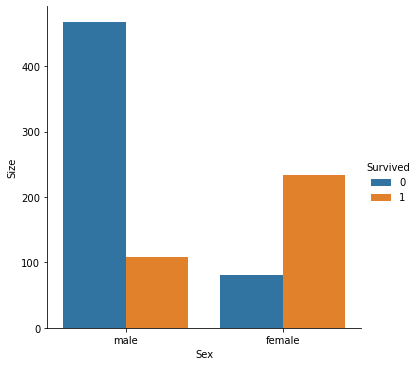

In [108]:
#Determine if the survival rate is associated to the gender
#calculate all correlations in df
display(df[["Sex","Survived"]].corr())
display(df.groupby(["Sex","Survived"]).size())
df1 = df[["Sex","Survived"]].value_counts().to_frame()
df1 = df1.reset_index()
df1.columns = ["Sex","Survived","Size"]
display(df1)
sns.catplot(x = "Sex",        # x variable name
            y = "Size",       # y variable name
            hue = "Survived", # group variable name
            data = df1,       # dataframe to plot
            kind = "bar")


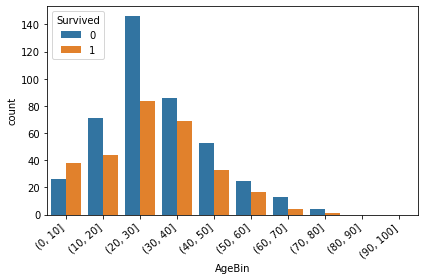

In [107]:
#Determine the survival rate is associated to the age
#bin the the by 10 years

bins = [0,10,20,30,40,50,60,70,80,90,100]
df['AgeBin'] = pd.cut(df['Age'],bins)
#display(df)
ax = sns.countplot(x='AgeBin',hue='Survived',data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


<AxesSubplot:xlabel='SibSp', ylabel='count'>

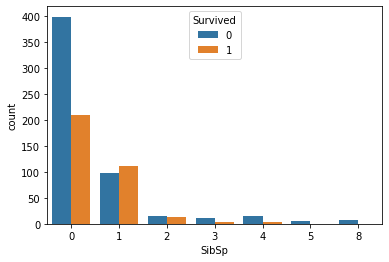

In [113]:
print(df["SibSp"].value_counts())
sns.countplot(x='SibSp',hue='Survived',data=df)